# 1. Data Analysis and Preparation

## 1.1 Load and Summarize Data
- Load `Country-data.csv` into a pandas DataFrame.
- Print the header using `DataFrame.head()`.
- Use `DataFrame.describe()` to summarize the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/Hunteracademic/Unsupervised_assignment_1/master/Country-data.csv"
country_data = pd.read_csv(url)
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000



#### Add some insights from describe
There are 9 different columns with numerical data that descriptive statistics can use. 

Notable there are 167 different counties in this dataset that represent each row. 


- Explain the meaning of each column.
- Make observations based on the summary statistics.
- Discuss whether these statistics provide useful insights.


## 1.2 Data Integrity and Cleaning
- Use `DataFrame.info()` to check data types and missing values.
- Use `DataFrame.duplicated()` to identify duplicate entries.
- Clean the dataset:
  - Remove missing values.
  - Drop duplicate rows.
  - Correct any incorrect data types.
- Document the cleaning process and changes in Markdown.


In [4]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
print(country_data.duplicated().sum())

0


In [6]:
print(country_data.isna().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


#### Data Cleaning Process
- Checking for duplicates in the dataset, we were unable to locate any duplicated records meaning we do not need to remove any of our entries and can proceed to the next check
- Checking for null values in our dataset we were unable to find any missing entries in the dataset.

*Dataset does not requires cleaning*

## 1.3 Feature Correlation and Visualization
- Drop the `country` column and store it separately.
- Use `seaborn.heatmap()` to display the correlation matrix.
- Use `seaborn.pairplot()` to generate scatter plots and histograms.
- Record observations in Markdown:
  - Discuss insights gained from the visualizations.


In [7]:
No_country_data = country_data.drop("country", axis=1)
country = country_data["country"]
No_country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
country

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

Text(0.5, 1.0, 'Correlation Heatmap of Country Data')

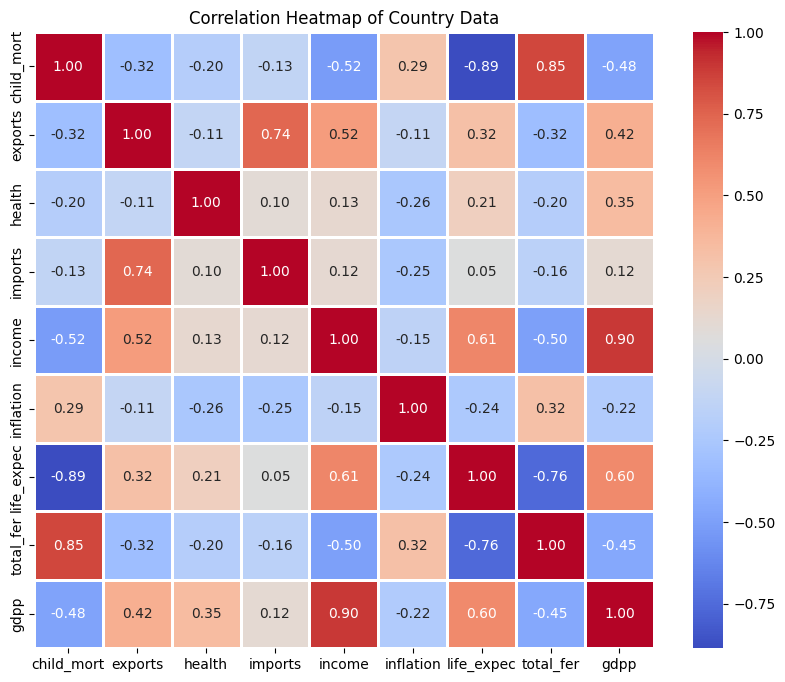

In [9]:
corr = No_country_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=1
)
plt.title("Correlation Heatmap of Country Data")

In [10]:
corr.to_numpy().flatten()

array([ 1.        , -0.31809322, -0.20040206, -0.12721092, -0.52431502,
        0.28827617, -0.8866761 ,  0.84847811, -0.48303217, -0.31809322,
        1.        , -0.1144084 ,  0.73738083,  0.5167836 , -0.10729439,
        0.3163126 , -0.32001055,  0.41872475, -0.20040206, -0.1144084 ,
        1.        ,  0.09571668,  0.12957861, -0.25537579,  0.21069212,
       -0.19667399,  0.34596553, -0.12721092,  0.73738083,  0.09571668,
        1.        ,  0.12240625, -0.24699428,  0.05439053, -0.15904843,
        0.11549817, -0.52431502,  0.5167836 ,  0.12957861,  0.12240625,
        1.        , -0.147756  ,  0.61196247, -0.50184005,  0.89557143,
        0.28827617, -0.10729439, -0.25537579, -0.24699428, -0.147756  ,
        1.        , -0.23970496,  0.31692107, -0.22163106, -0.8866761 ,
        0.3163126 ,  0.21069212,  0.05439053,  0.61196247, -0.23970496,
        1.        , -0.76087469,  0.60008913,  0.84847811, -0.32001055,
       -0.19667399, -0.15904843, -0.50184005,  0.31692107, -0.76

#### Insights from Correlation Heatmap
- 
- 
- 

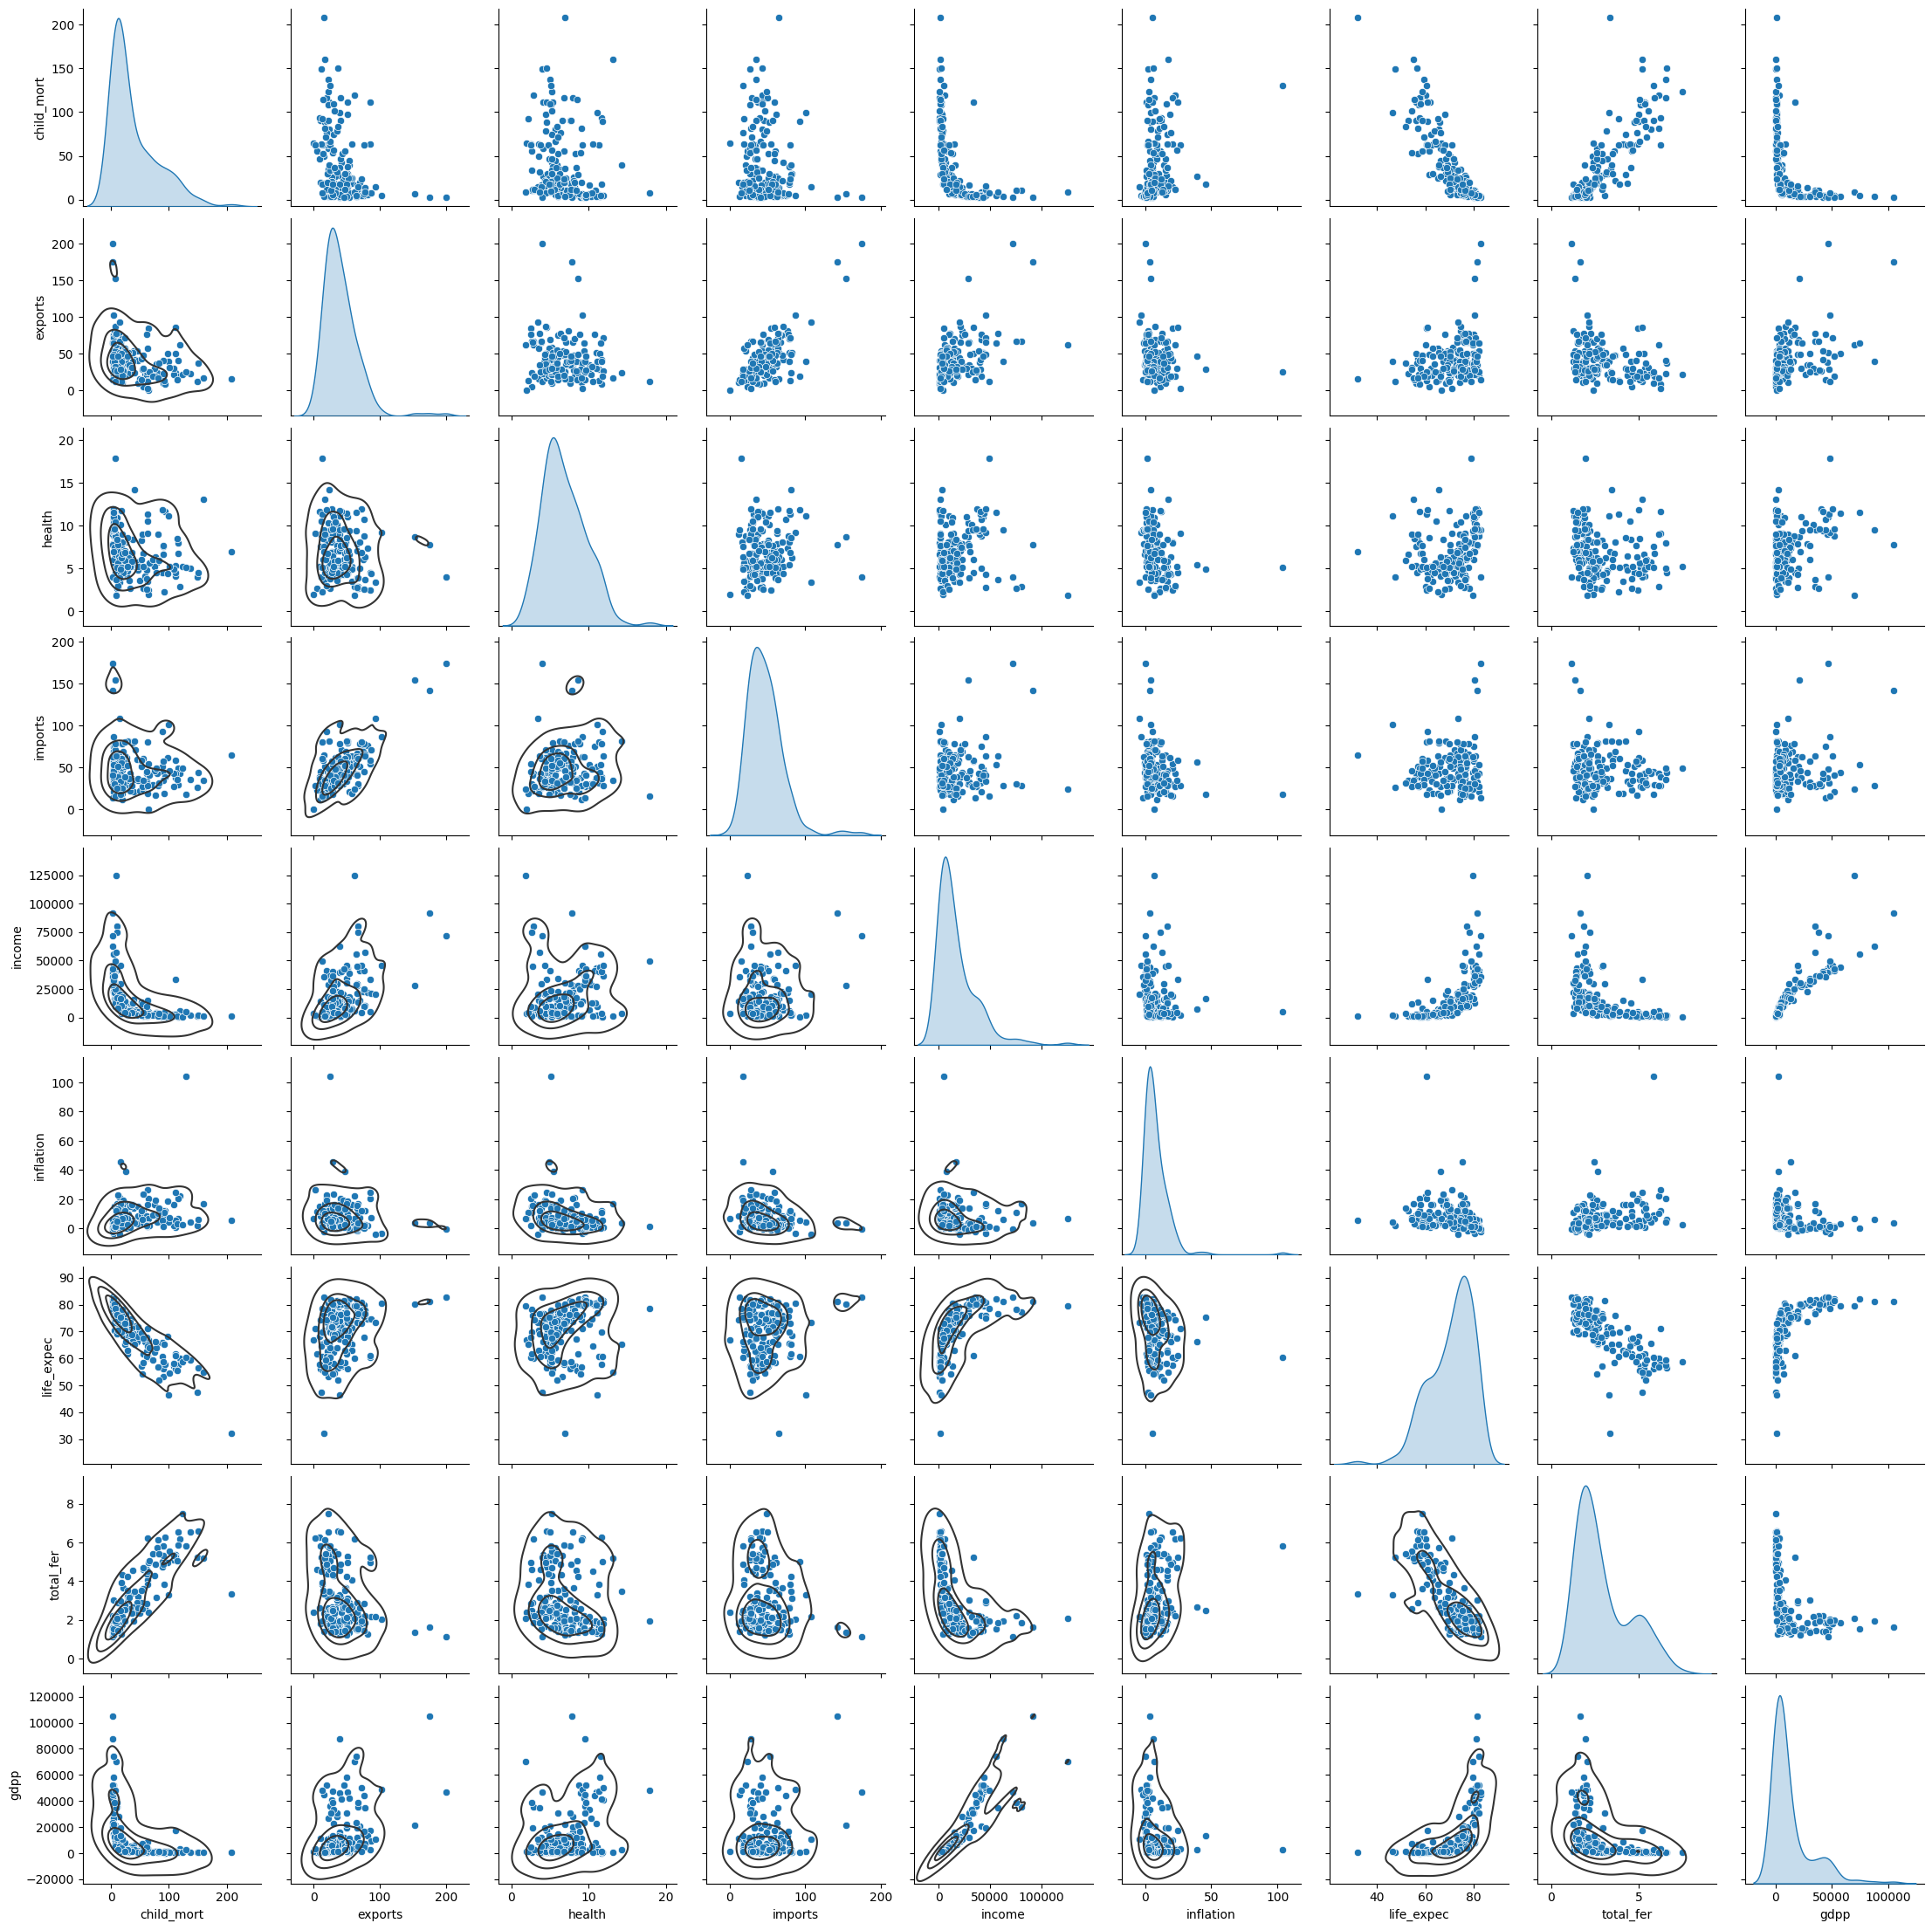

In [11]:
#ns.pairplot(No_country_data)

g = sns.pairplot(No_country_data, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

# The pairplot that she gave us outputs a ton of info. 
### After this visual we have more specific graphs for insights on high or low correlated features.
##### *change the hashtag to see a different set of the pairplot*
##### *adjust as you feel necessary*

### Pairplot Insights
- 
- 
- 

# Below are more graphs for visualization, they are reiterating the pairplot graph 

# *Do we need these?*

### Insights
- 
- 
- 



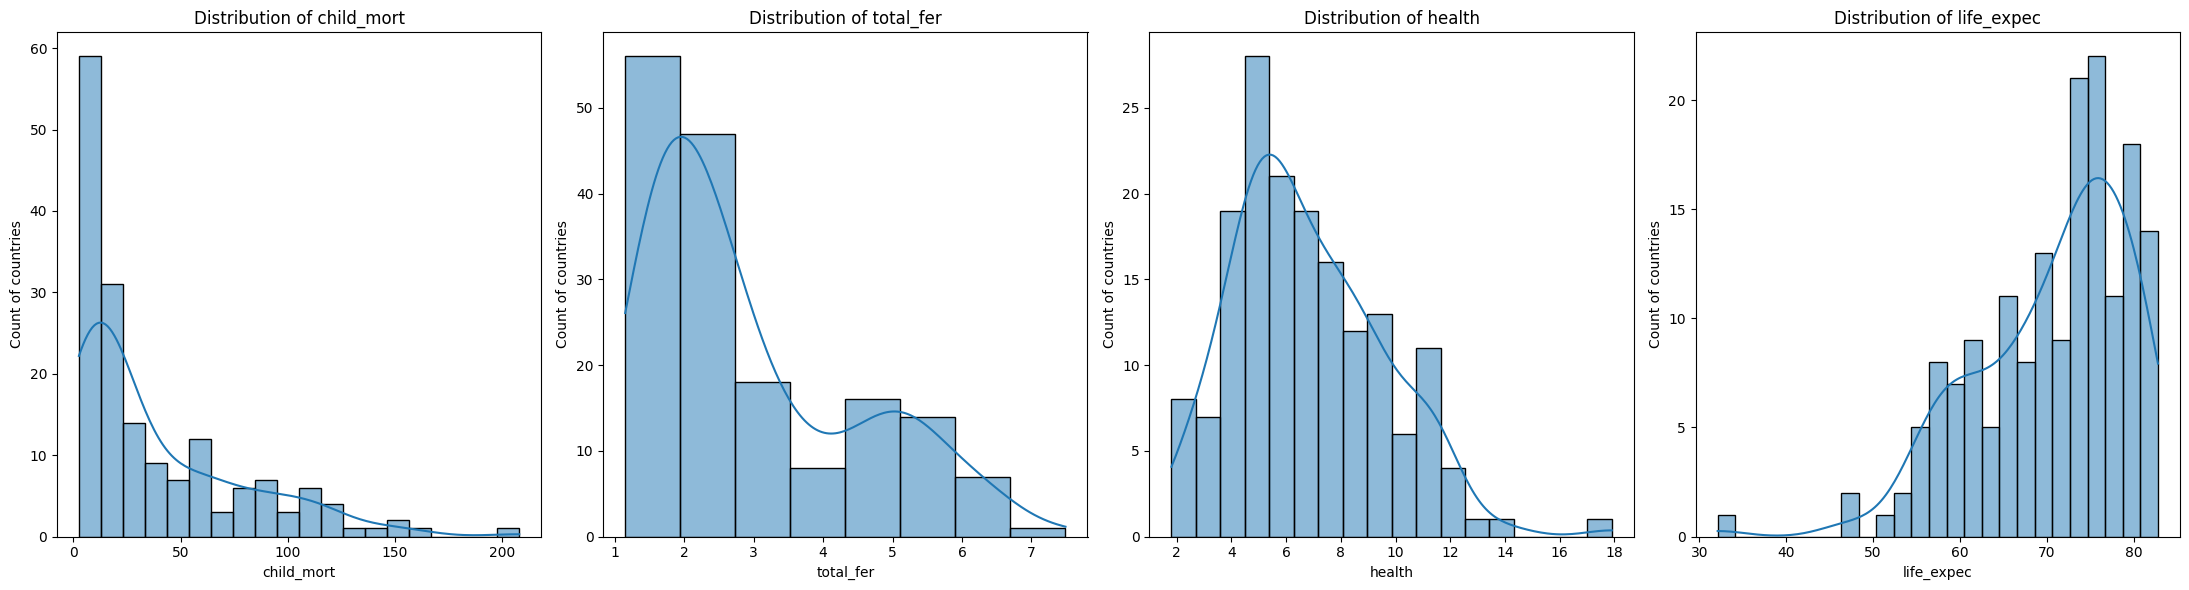

In [12]:
def histogram(df, column, bin_s, ax):
    sns.histplot(
        data=df,
        x=column,
        bins= bin_s,
        kde=True,
        ax=axes[ax]
    )
    axes[ax].set_title(f"Distribution of {column}")
    axes[ax].set_xlabel(f"{column}")
    axes[ax].set_ylabel("Count of countries")

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 6))

histogram(No_country_data, "child_mort", 20,  0)
histogram(No_country_data, "total_fer", 8, 1)
histogram(No_country_data, "health", 18, 2)
histogram(No_country_data, "life_expec",25, 3)

plt.tight_layout()
plt.show()


# 2. Clustering and Modeling

## 2.1 Data Scaling
- Use `sklearn.preprocessing.StandardScaler` to scale the data.
- Print the transformed header.


In [13]:
No_country_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [14]:
scaler = StandardScaler()
scaled = scaler.fit_transform(No_country_data)
df_scaled = pd.DataFrame(scaled, columns=No_country_data.columns, index=No_country_data.index)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817



## 2.2 KMeans Clustering and Evaluation
- Use `sklearn.cluster.KMeans` to cluster the data.
- Try `n_clusters` values in the range [2, 10].
- Calculate the silhouette score for each value.
- Plot silhouette score vs. number of clusters.


In [15]:
def k_means(X, K):
#Keep track of history so you can see K-Means in action
    centroids_history = []
    labels_history = []
    rand_index = np.random.choice(X.shape[0], K)  
    centroids = X[rand_index]
    centroids_history.append(centroids)
    while True:
# Euclidean distances are calculated for each point relative to centroids, #and then np.argmin returns
# the index location of the minimal distance - which cluster a point is #assigned to
        labels = np.argmin(cdist(X, centroids), axis=1)
        labels_history.append(labels)
#Take mean of points within clusters to find new centroids:
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                for i in range(K)])
        centroids_history.append(new_centroids)
        
        # If old centroids and new centroids no longer change, K-Means is complete and end. Otherwise continue
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, centroids_history, labels_history


Text(0, 0.5, 'Silhouette Scores')

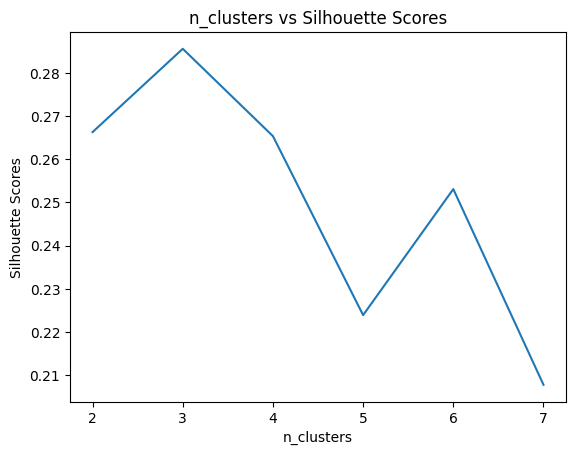

In [16]:
np.random.seed(0)
silhouette_score_list = []
n_clusters = range(2,8)
for i in n_clusters:
    centroids, labels, _, _ = k_means(df_scaled.values, i)
    silhouette_score_list.append(silhouette_score(df_scaled, labels))

sns.lineplot(x=n_clusters,y=silhouette_score_list)
plt.title('n_clusters vs Silhouette Scores')
plt.xlabel('n_clusters')
plt.ylabel('Silhouette Scores')


## 2.3 Model Selection and Justification
- Choose the best model based on silhouette scores and other criteria.
- Justify the selected number of clusters in Markdown.
- Save the corresponding model as the best model.
- Note: Silhouette score is a guide, not an absolute metric.



# 3. Conclusion

## 3.1 Cluster Visualization
- Choose a pair of columns from step 1.
- Generate a scatter plot colored by cluster assignment.
- Comment on the plot in Markdown.


In [17]:
def try_features_pair(feature_x, feature_y, n_clusters):
        np.random.seed(0)
        centroids, labels, _, _ = k_means(df_scaled[[feature_x, feature_y]].values, n_clusters)

        plt.figure(figsize=(10,7))
        plt.scatter(df_scaled[feature_x], df_scaled[feature_y], c=labels,
                s=50, cmap='tab20b');
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
        plt.xlabel(feature_x)
        plt.ylabel(feature_y)
        plt.title(f'K-Means Clustering of {feature_x} vs {feature_y}')  
        plt.show()
        return pd.DataFrame(df_scaled.index).join(pd.DataFrame(labels, columns=['Cluster']))
        

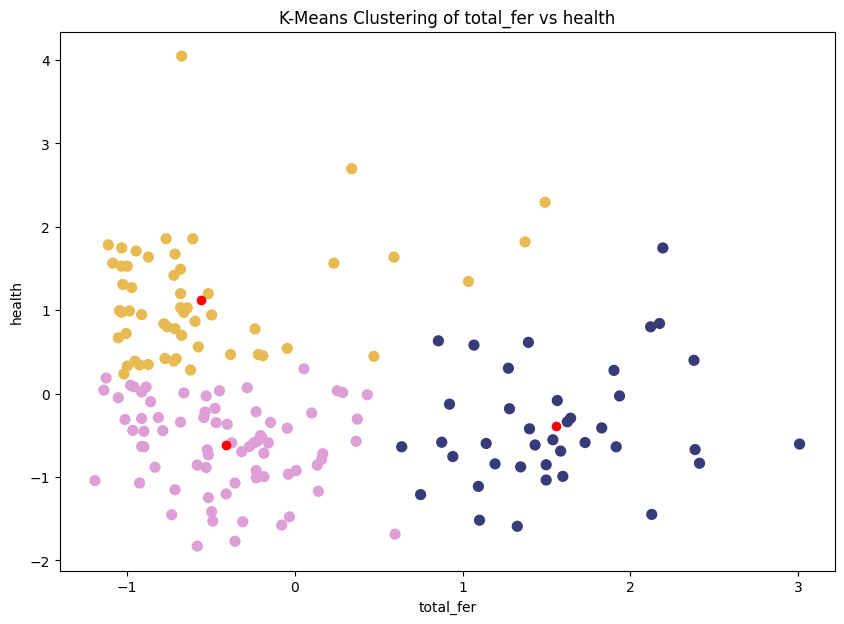

,Cluster,country
0,0,Afghanistan
1,2,Albania
2,2,Algeria
3,0,Angola
4,2,Antigua and Barbuda
...,...,...
162,2,Vanuatu
163,2,Venezuela
164,2,Vietnam
165,0,Yemen


In [18]:
cluster_df = try_features_pair('total_fer', 'health', 3)
cluster_df = cluster_df.join(country_data['country'])[['Cluster', 'country']]
cluster_df

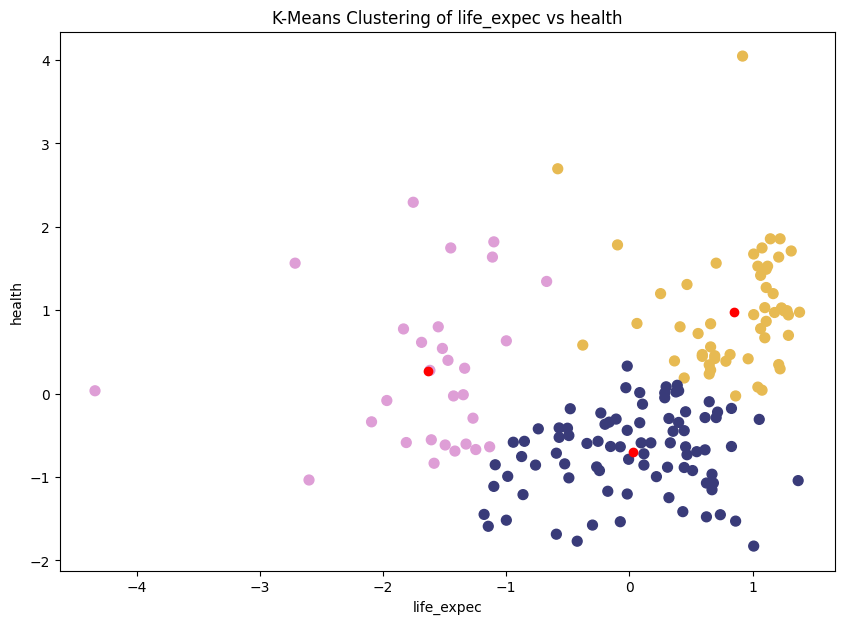

,0,Cluster
0,0,2
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
162,162,0
163,163,0
164,164,0
165,165,0


In [19]:
try_features_pair('life_expec', 'health', 3)

In [ ]:
pd.DataFrame()

""



## 3.2 Cluster Size Distribution
- Generate a histogram showing the number of countries in each cluster.
- Provide observations in Markdown:
  - Discuss whether the cluster sizes make sense.


Text(0.5, 1.0, 'Cluster Distribution')

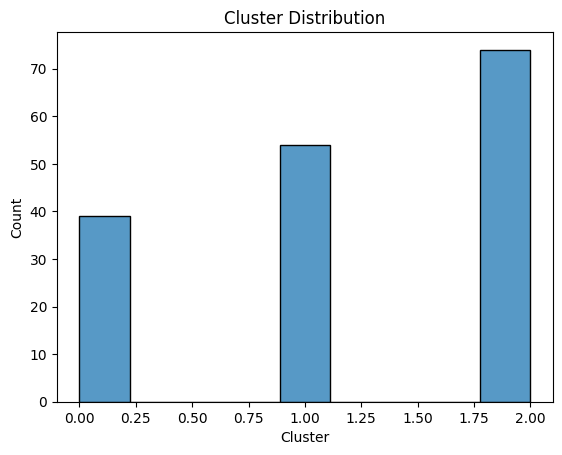

In [ ]:
sns.histplot(cluster_df['Cluster'])
plt.title('Cluster Distribution')


## 3.3 Cluster Composition and Ranking
- Print the country names in each cluster.
- Comment on the logical coherence of the results.
- Rank clusters from most aid-needed to least.
- Use quick research to verify alignment with real-world conditions.
- Summarize findings in Markdown.



## 3.4 Fund Allocation Strategy
- Describe which countries will receive funds.
- Specify how much each country will receive.
- Justify the allocation strategy.